In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
from plotly import subplots
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import BaseDecisionTree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/test/Credit_Risk.xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,State
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,North Dakota
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,Texas
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,Illinois
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,Florida
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,Alaska


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   BILL_AMT1                   30000 non-null  int64 
 7   BILL_AMT2                   30000 non-null  int64 
 8   BILL_AMT3                   30000 non-null  int64 
 9   BILL_AMT4                   30000 non-null  int64 
 10  BILL_AMT5                   30000 non-null  int64 
 11  BILL_AMT6                   30000 non-null  int64 
 12  PAY_AMT1                    30000 non-null  int64 
 13  PAY_AMT2                    30000 non-null  in

In [ ]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
State                            50
dtype: int64

Overview


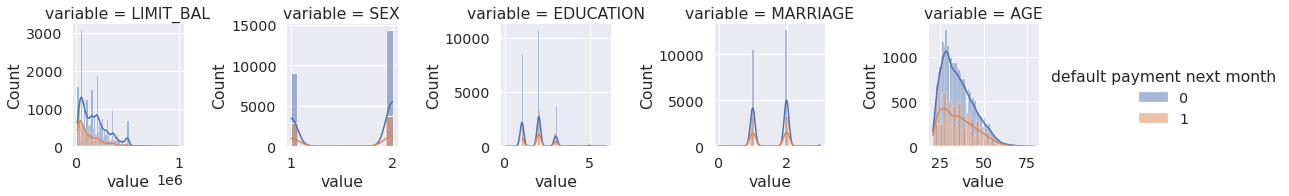

In [ ]:
output = 'default payment next month'

cols = [ f for f in df.iloc[:, 1:6]]


f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.histplot, "value", kde=True).add_legend()

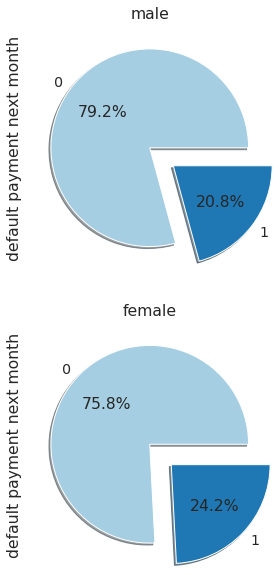

In [ ]:
sns.set_palette("Paired")
f, ax = plt.subplots(2,figsize=(10,10))
gender=df['SEX'].unique()
list=['male','female']
i=0
for g in gender :
  data = df[df['SEX']==g]
  data = data['default payment next month'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i])   
  ax[i].set_title(list[i])
  i+=1

([<matplotlib.axis.XTick at 0x7f5f6d9a7ed0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

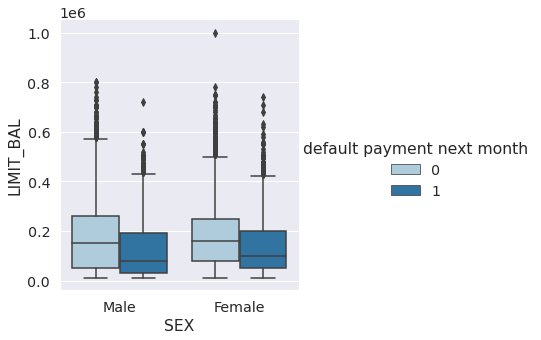

In [ ]:
sns.set_palette("Paired")
positions = (0, 1)
labels = ("Male", "Female")
sns.catplot(x='SEX' , y='LIMIT_BAL' , hue='default payment next month' , kind='box' , data = df) 
plt.xticks(positions,labels)

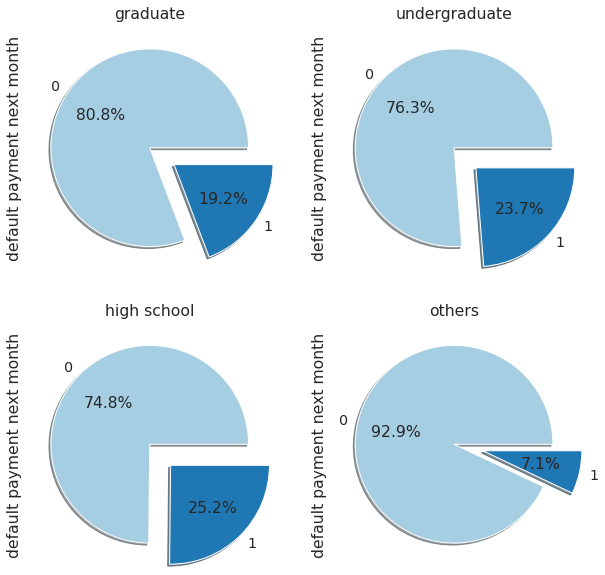

In [ ]:
def rep(Edu):
  if Edu in [0,4,5,6]:
    return 4
  else:
    return Edu  

df['EDUCATION'] = df['EDUCATION'].apply(rep)

sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
Edu=[1,2,3,4]
list = ['graduate','undergraduate','high school','others']
i=0
j=0
for e in Edu :
  data = df[df['EDUCATION']==e]
  data = data['default payment next month'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])   
  #data.plot.pie ()
  ax[i][j].set_title(list[e-1])
  j+=1
  if j%2 == 0:
    i+=1
    j=0

([<matplotlib.axis.XTick at 0x7f5f6d60d190>,
 [Text(0, 0, 'graduate'),
  Text(1, 0, 'undergraduate'),
  Text(2, 0, 'high school'),
  Text(3, 0, 'others')])

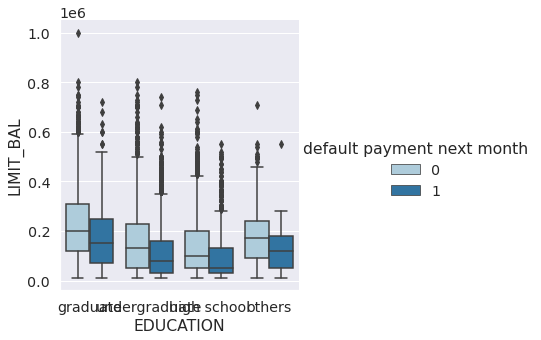

In [ ]:
sns.set_palette("Paired")
positions = (0,1,2,3)
labels = ("graduate", "undergraduate" , 'high school','others')
sns.catplot(x='EDUCATION' , y='LIMIT_BAL' , hue='default payment next month' , kind='box' , data = df) 
plt.xticks(positions,labels)

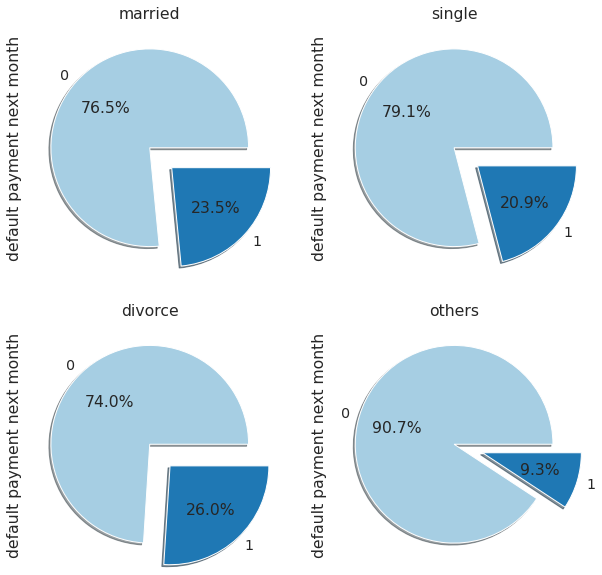

In [ ]:
sns.set_palette("Paired")
f, ax = plt.subplots(2,2,figsize=(10,10))
m_status=df['MARRIAGE'].unique()
list=['married','single','divorce', 'others']
i=0
j=0
for m in m_status :
  data = df[df['MARRIAGE']==m]
  data = data['default payment next month'].value_counts()/data.shape[0]*100
  data.plot.pie(shadow = True, autopct="%.1f%%",explode=(0,0.3), ax=ax[i][j])
  ax[i][j].set_title(list[m-1])
  j+=1
  if j%2 == 0:
    i+=1
    j=0

([<matplotlib.axis.XTick at 0x7f5f61602a50>,
 [Text(0, 0, 'others'),
  Text(1, 0, 'married'),
  Text(2, 0, 'single'),
  Text(3, 0, 'divorce')])

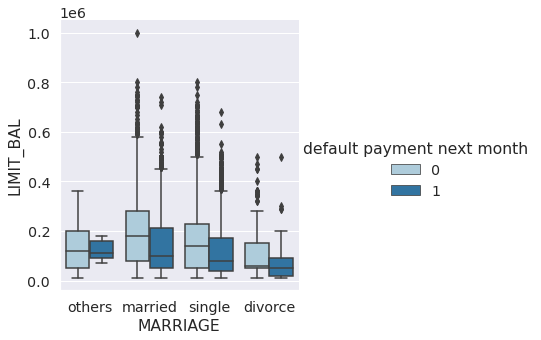

In [ ]:
sns.set_palette("Paired")
positions = (0,1,2,3)
labels = ('others','married','single','divorce')
sns.catplot(x='MARRIAGE' , y='LIMIT_BAL' , hue='default payment next month' , kind='box' , data = df) 
plt.xticks(positions,labels)

In [ ]:
df_good = df.loc[df["default payment next month"] == 1]['State'].values.tolist()
df_bad = df.loc[df["default payment next month"] == 0]['State'].values.tolist()
df_age = df['AGE'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Default"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Non Default"
)
#Creating the grid
fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Default','Non Default',))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(showlegend=True, title='State Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
df_good = df.loc[df["default payment next month"] == 1]['AGE'].values.tolist()
df_bad = df.loc[df["default payment next month"] == 0]['AGE'].values.tolist()
df_age = df['AGE'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Default"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Non Default"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Default','Non Default', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Modelling

In [ ]:
df1 = df[df.columns[:-1]]
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


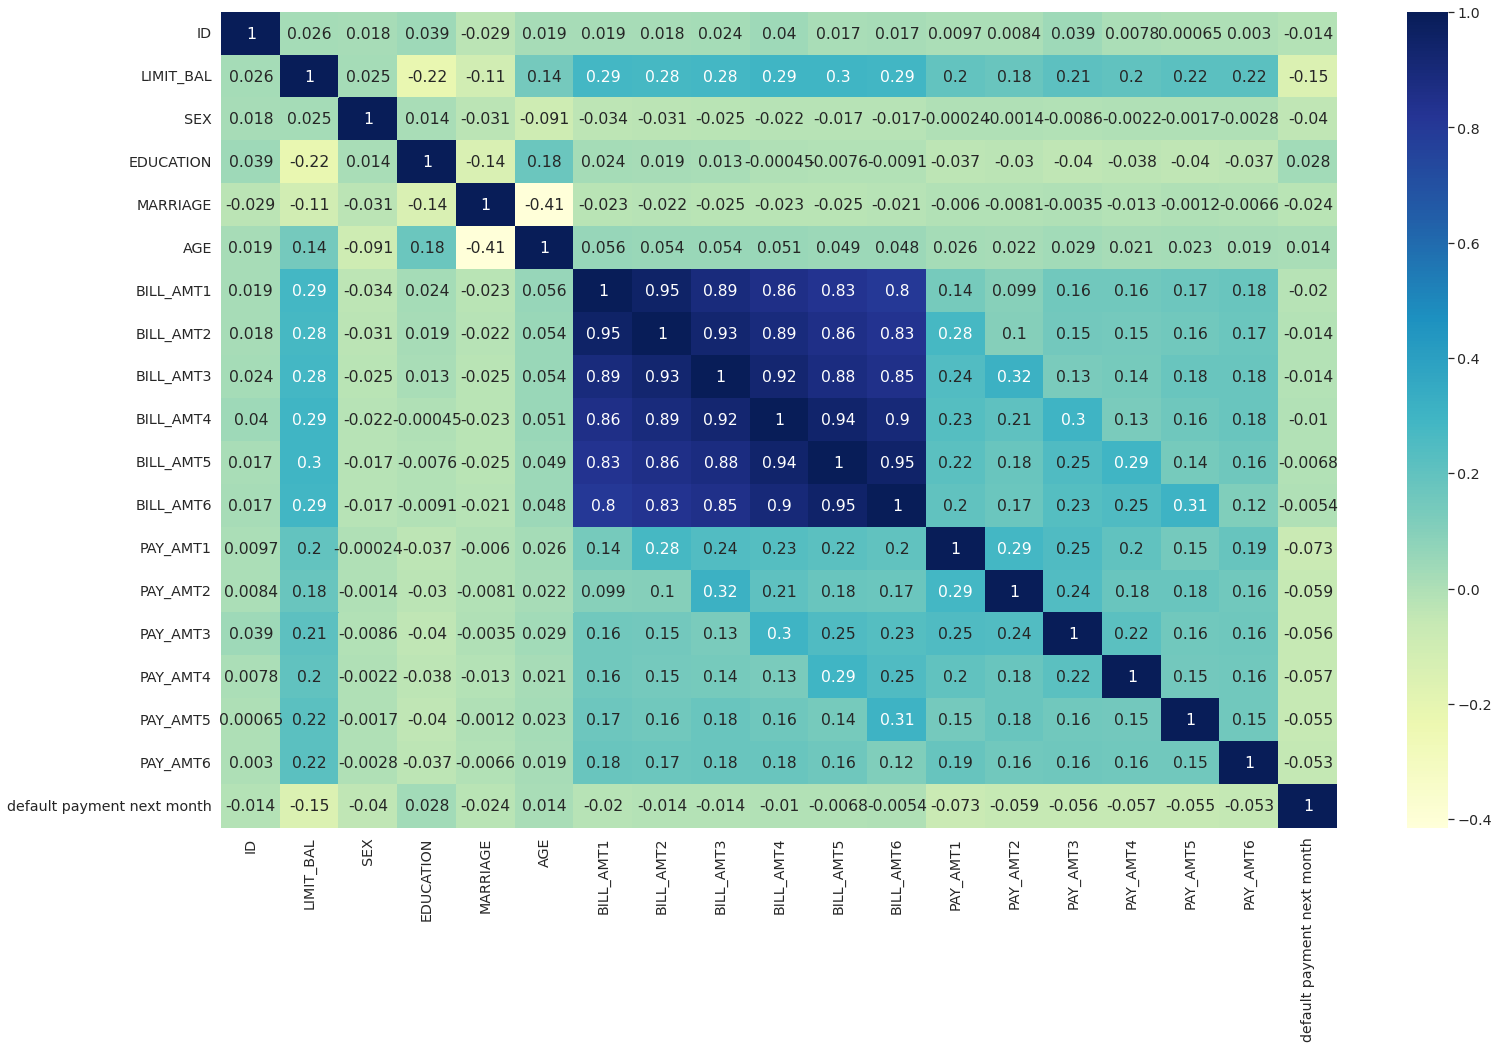

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [ ]:
# Distinguish attribute columns and class column.
X=df1[df1.columns[:-1]]
y=df1['default payment next month']

In [ ]:
# Split to train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=25)

In [ ]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Decision tree

In [ ]:
## Decision Tree

# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

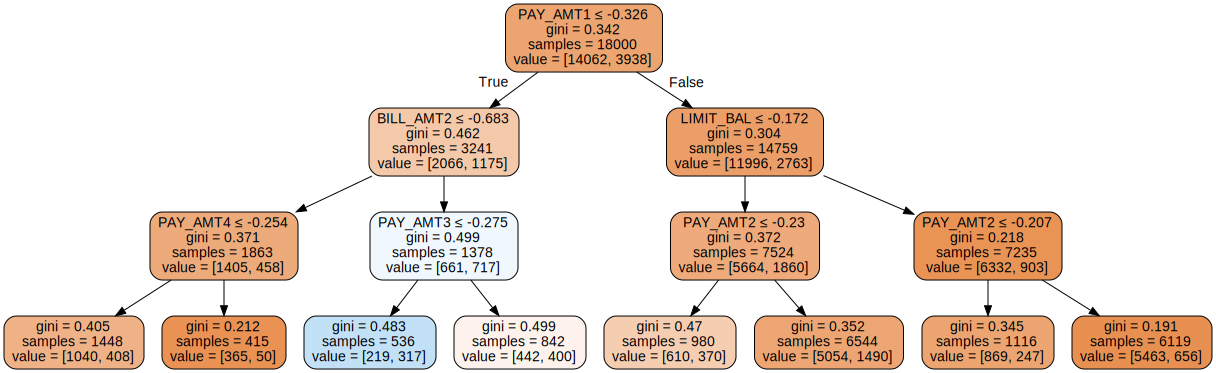

In [ ]:
# Plot the tree.
dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

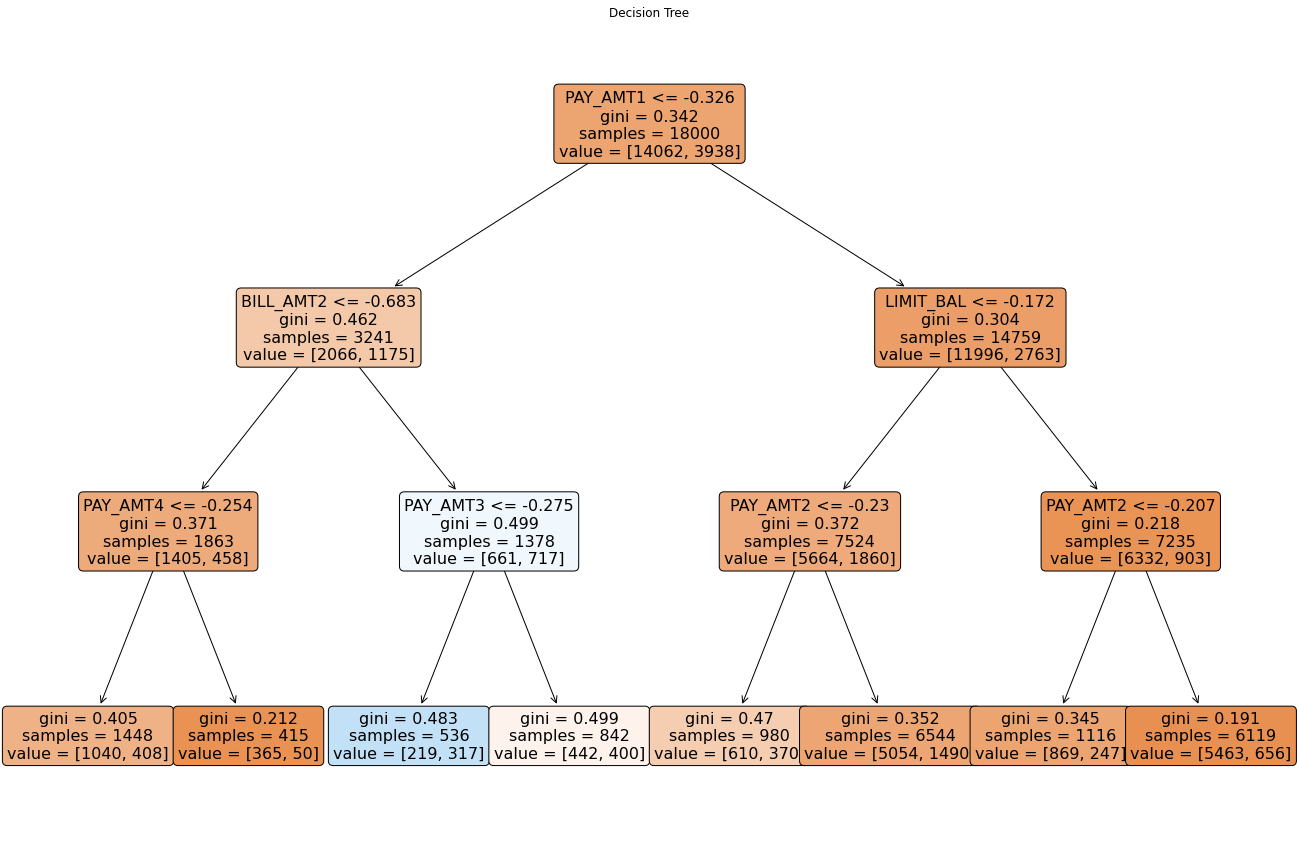

In [ ]:
# Plot the tree.
fig=plt.figure(figsize=(23,15))
tree.plot_tree(tr.fit(X_train, y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree');

In [ ]:
# Make predictions.
tr_pred=tr.predict(X_test)

# CV score
tr_cv=cross_val_score(tr, X_train, y_train, cv=10).mean()

In [ ]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % tr_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Precision: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

Accuracy: 0.778
Cross-validation accuracy: 0.783
Precision: 0.545
Precision: 0.071
F1 score: 0.126


In [ ]:
matrix = classification_report(y_test, tr_pred)
print("classification report: \n", matrix)

classification report: 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      9302
           1       0.55      0.07      0.13      2698

    accuracy                           0.78     12000
   macro avg       0.67      0.53      0.50     12000
weighted avg       0.73      0.78      0.70     12000



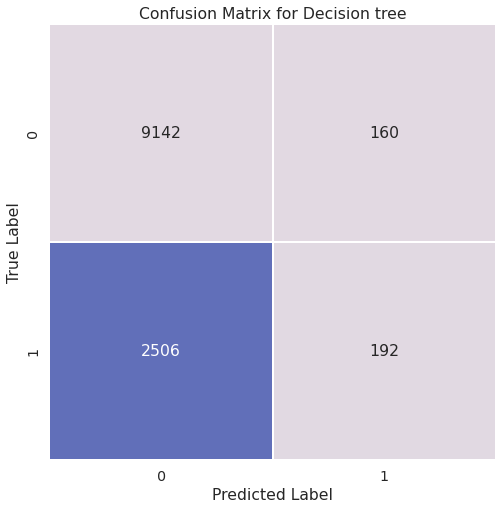

In [ ]:
# Plot confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

In [ ]:
# Predict propabilities for the test data.
tr_probs = tr.predict_proba(X_test)

# Keep Probabilities of the positive class only.
tr_probs = tr_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(y_test, tr_probs)
print('AUC: %.2f' % auc_tr)

AUC: 0.66


Grid Search for Decision tree


In [ ]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [ ]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

In [ ]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_tree_pred))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 2}
Cross-validation accuracy: 0.784
Accuracy: 0.778
Precision: 0.517
Recall: 0.182
F1 score: 0.270


In [ ]:
matrix = classification_report(y_test, gs_tree_pred)
print("classification report: \n", matrix)

classification report: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      9302
           1       0.52      0.18      0.27      2698

    accuracy                           0.78     12000
   macro avg       0.66      0.57      0.57     12000
weighted avg       0.74      0.78      0.73     12000



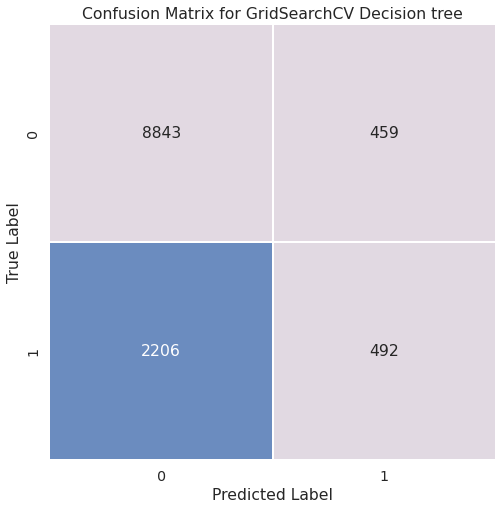

In [ ]:
# Plot confusion matrix for Decision tree.
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

In [ ]:
# Predict probabilities for the test data.
gs_tree_probs = gs_tree.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_tree_probs = gs_tree_probs[:, 1]

# Compute the AUC Score.
gs_tree_auc = roc_auc_score(y_test, gs_tree_probs)
print('AUC: %.2f' % gs_tree_auc)

AUC: 0.64


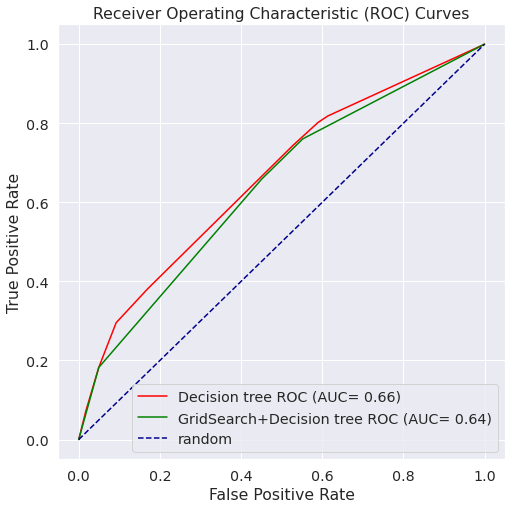

In [ ]:
# Get the ROC Curves.
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(y_test, gs_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Logistic Regression


In [ ]:
## Logistic Regression
# Initialize a Logistic Regression estimator.
logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# Train the estimator.
logreg.fit(X_train,y_train)

LogisticRegression(n_jobs=-1, random_state=25)

In [ ]:
# Make predictions.
log_pred=logreg.predict(X_test)

#CV score
logreg_cv=cross_val_score(logreg, X_train, y_train, cv=10).mean()

In [ ]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % logreg.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % logreg_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, log_pred))

Accuracy: 0.775
Cross-validation accuracy: 0.781
Precision: 0.000
Recall: 0.000
F1 score: 0.000


In [ ]:
matrix = classification_report(y_test, log_pred)
print("classification report: \n", matrix)

classification report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      9302
           1       0.00      0.00      0.00      2698

    accuracy                           0.78     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.60      0.78      0.68     12000



In [ ]:
# Predict probabilities for the test data.
logreg_probs = logreg.predict_proba(X_test)

# Keep Probabilities of the positive class only.
logreg_probs = logreg_probs[:, 1]

# Compute the AUC Score.
auc_logreg = roc_auc_score(y_test, logreg_probs)
print('AUC: %.2f' % auc_logreg)

AUC: 0.67


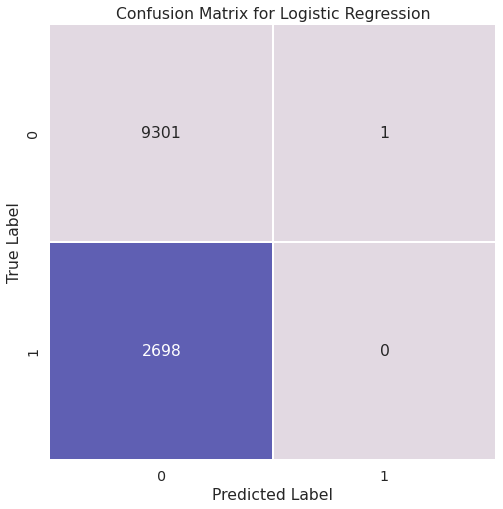

In [ ]:
# Plot confusion matrix for Logistic Regression.
logreg_matrix = confusion_matrix(y_test,log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(logreg_matrix, annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression');

In [ ]:
#Grid search for Logistic Regression

# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

# Logistic Regression estimator.
default_logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             verbose=1)

In [ ]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(X_test)

In [ ]:
# Best parameters.
print("Best Logistic Regression Parameters: {}".format(gs_logreg.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_logreg.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_logreg.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_log_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_log_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_log_pred))

Best Logistic Regression Parameters: {'C': 0.0001, 'penalty': 'none', 'solver': 'sag'}
Cross-validation accuracy: 0.781
Accuracy: 0.775
Precision: 0.000
Recall: 0.000
F1 score: 0.000


In [ ]:
matrix = classification_report(y_test, gs_log_pred)
print("classification report: \n", matrix)

classification report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      9302
           1       0.00      0.00      0.00      2698

    accuracy                           0.78     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.60      0.78      0.68     12000



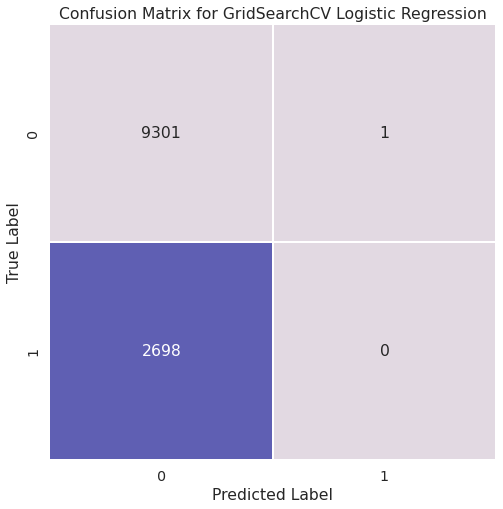

In [ ]:
# Print confusion matrix for GridSearch Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

In [ ]:
# Predict probabilities for the test data.
gs_logreg_probs = gs_logreg.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_logreg_probs = gs_logreg_probs[:, 1]

# Compute the AUC Score.
gs_logreg_auc = roc_auc_score(y_test, gs_logreg_probs)
print('AUC: %.2f' % gs_logreg_auc)

AUC: 0.67


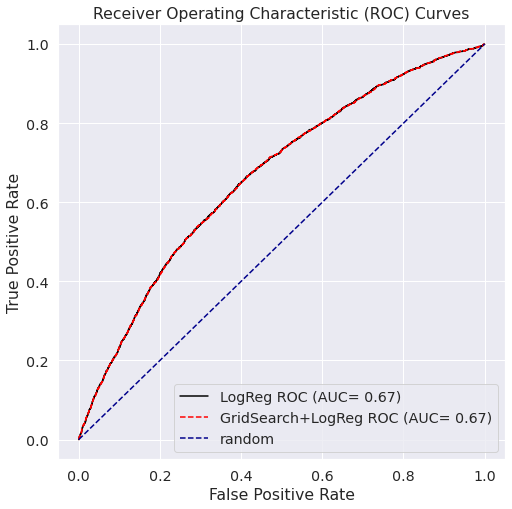

In [ ]:
# Get the ROC curves.
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_probs)
gs_logreg_fpr, gs_logreg_tpr, gs_logreg_thresholds = roc_curve(y_test, gs_logreg_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(logreg_fpr, logreg_tpr, color='black', label='LogReg ROC (AUC= %0.2f)'% auc_logreg)
plt.plot(gs_logreg_fpr, gs_logreg_tpr, color='red', linestyle='--',label='GridSearch+LogReg ROC (AUC= %0.2f)'% gs_logreg_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [ ]:
# Naive Bayes 
#--------------
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

Accuracy on Test Set for NBClassifier = 0.35
Mean NaiveBayes CrossVal Accuracy on Train Set 0.35, with std=0.01


In [ ]:
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.73
Mean KN CrossVal Accuracy on Train Set Set 0.35, with std=0.01


In [ ]:
# kernel SVM 
#--------------
from sklearn.svm import SVC

classifier1 = SVC(kernel="rbf")
# Train the estimator
classifier1.fit( X_train, y_train )
# make predictions
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for kernel-SVM = 0.78
Mean kernel-SVM CrossVal Accuracy on Train Set 0.78, with std=0.00


In [ ]:
matrix = classification_report(y_test, y_pred)
print("classification report: \n", matrix)

classification report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      9302
           1       0.00      0.00      0.00      2698

    accuracy                           0.78     12000
   macro avg       0.39      0.50      0.44     12000
weighted avg       0.60      0.78      0.68     12000



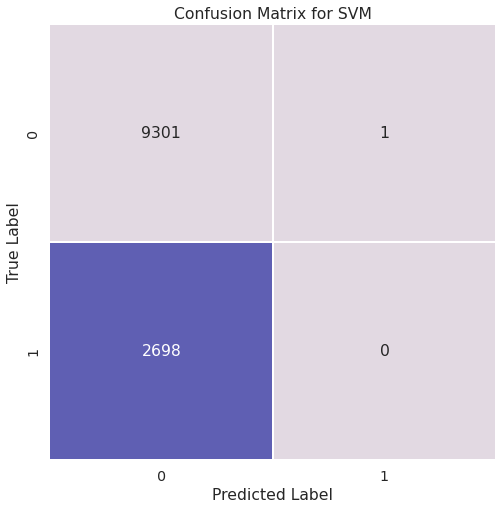

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for SVM');